In [132]:
import pandas as pd
import seaborn as sns
from firebase import firebase
from matplotlib import pyplot as plt

In [35]:
fb = firebase.FirebaseApplication('https://classiot-3ae5a-default-rtdb.firebaseio.com/', None)
bridges = fb.get('/Bridges', None)
bridges

{'1668021419': {'BridgeId': '1',
  'Humidity': 46.855507474,
  'Latitude': -1.184088,
  'Longitude': 27.047712,
  'Time': 1668021419,
  'VehicleWeight': 337.154299789},
 '1668021500': {'BridgeId': '1',
  'Humidity': 41.527389614,
  'Latitude': -1.184088,
  'Longitude': 27.047712,
  'Time': 1668021500,
  'VehicleWeight': 316.949526221},
 '1668021512': {'BridgeId': '1',
  'Humidity': 41.869550534,
  'Latitude': -1.184088,
  'Longitude': 27.047712,
  'Time': 1668021512,
  'VehicleWeight': 309.920878662},
 '1668062652': {'BridgeId': '1',
  'Humidity': 33.208562983,
  'Latitude': -1.184088,
  'Longitude': 27.047712,
  'Time': 1668062652,
  'VehicleWeight': 337.897285144},
 '1668062688': {'BridgeId': '1',
  'Humidity': 30.278128292,
  'Latitude': -1.184088,
  'Longitude': 27.047712,
  'Time': 1668062688,
  'VehicleWeight': 338.872275106},
 '1668067268': {'BridgeId': '1',
  'Humidity': 37.547530886,
  'Latitude': -1.184088,
  'Longitude': 27.047712,
  'Time': 1668067268,
  'VehicleWeight': 34

In [76]:
df = pd.DataFrame.from_dict(bridges)
new_df = pd.DataFrame(df.iloc[1])

In [74]:
df

,1668021419,1668021500,1668021512,1668062652,1668062688,1668067268,1668067344,1668071415,1668071439,1668071465
BridgeId,1,1,1,1,1,1,1,1,1,1
Humidity,46.855507,41.52739,41.869551,33.208563,30.278128,37.547531,47.438953,44.303168,49.928381,45.600858
Latitude,-1.184088,-1.184088,-1.184088,-1.184088,-1.184088,-1.184088,-1.184088,-1.184088,-1.184088,-1.184088
Longitude,27.047712,27.047712,27.047712,27.047712,27.047712,27.047712,27.047712,27.047712,27.047712,27.047712
Time,1668021419,1668021500,1668021512,1668062652,1668062688,1668067268,1668067343,1668071415,1668071439,1668071465
VehicleWeight,337.1543,316.949526,309.920879,337.897285,338.872275,343.775355,310.958268,338.44132,317.961017,345.742595


In [148]:
new_df

,Humidity
1668021419,46.855507
1668021500,41.52739
1668021512,41.869551
1668062652,33.208563
1668062688,30.278128
1668067268,37.547531
1668067344,47.438953
1668071415,44.303168
1668071439,49.928381
1668071465,45.600858


In [162]:
pd.to_datetime(df.iloc[4]).apply(lambda x: x.date()
)


1668021419    1970-01-01
1668021500    1970-01-01
1668021512    1970-01-01
1668062652    1970-01-01
1668062688    1970-01-01
1668067268    1970-01-01
1668067344    1970-01-01
1668071415    1970-01-01
1668071439    1970-01-01
1668071465    1970-01-01
Name: Time, dtype: object

Text(0.5, 1.0, 'Humidity Changes vs. Time')

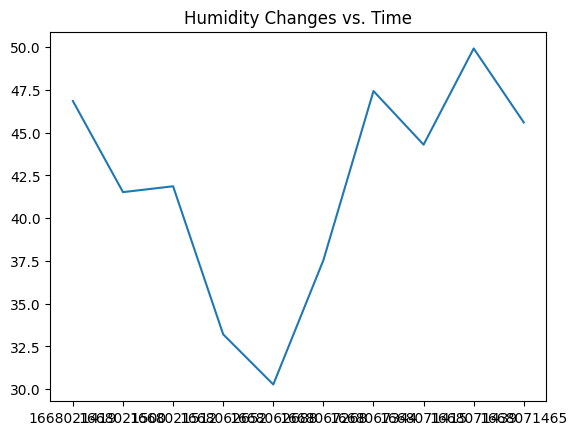

In [77]:
plt.plot(new_df)
plt.title('Humidity Changes vs. Time')

In [145]:
humidity = pd.DataFrame(df.iloc[1].reset_index(drop=True))['Humidity']
vehicleWeight = pd.DataFrame(df.iloc[5].reset_index(drop=True))['VehicleWeight']
date = pd.DataFrame(df.iloc[4].reset_index(drop=True))['Time']

vehicle_weight = vehicleWeight.to_frame()
humidity = humidity.to_frame()
date = date.to_frame()

In [147]:
"""Convert timestamp into HH:MM:SS"""
date.dt.date

AttributeError: 'DataFrame' object has no attribute 'dt'

In [134]:
"""Plotting the Humidity vs Time"""

data = pd.concat([humidity, date], axis=1)
# plt.plot(al)
# plt.legend(['humidity', 'date'])

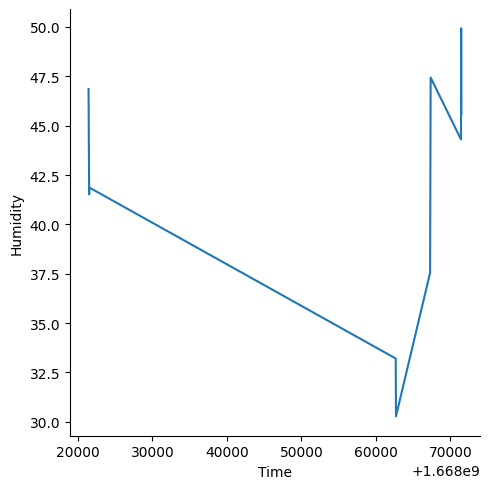

In [137]:
# Testing out seaborn
sns.relplot(data=data, x="Time", y="Humidity", kind="line")
